In [9]:
# 匯入 Keras 模組
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

# -----------------------------
# 建立一個序列式 (Sequential) 模型
# -----------------------------
model = Sequential()

# -----------------------------
# 模型結構設計
# -----------------------------

# 1️⃣ Flatten層：將輸入的多維陣列攤平成一維向量
#   假設輸入是 28x28 的圖片 (例如MNIST)，
#   攤平成 784 維的向量以供全連接層(Dense layer)使用
model.add(Flatten())

# 2️⃣ 第一層全連接層 (Dense layer)
#   - 有 32 個神經元
#   - 使用 ReLU 激活函數
#   - 指定輸入維度為 784 (對應 28x28 圖片)
model.add(Dense(32, activation='relu', input_dim=784))

# 3️⃣ 第二層全連接層
#   - 32 個神經元
#   - 使用 ReLU 激活函數
model.add(Dense(32, activation='relu'))

# 4️⃣ 輸出層 (Output layer)
#   - 10 個神經元（對應 0~9 的分類）
#   - 使用 sigmoid 激活函數（建議分類問題可改為 softmax）
model.add(Dense(10, activation='sigmoid'))

# -----------------------------
# 編譯模型
# -----------------------------
# - 優化器：RMSProp（自動調整學習率的常見選擇）
# - 損失函數：sparse_categorical_crossentropy
#   → 用於整數標籤的多分類問題（例如 y=[0,1,2,...,9]）
# - 評估指標：accuracy（正確率）
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()

In [12]:
# 印出訓練資料 (train_data) 的型態
# 通常會是 numpy.ndarray，表示資料是以陣列形式儲存
print(type(train_data))

# 印出訓練資料的維度（形狀）
# 例如 (60000, 28, 28) 表示共有 6 萬張 28x28 的影像
print(train_data.shape)

# 印出訓練標籤 (train_label) 的型態
# 一般來說也是 numpy.ndarray
print(type(train_label))

# 印出訓練標籤的維度
# 例如 (60000,) 表示有 6 萬個對應的標籤（每張圖一個數字）
print(train_label.shape)

# 印出測試資料 (test_data) 的維度
# 例如 (10000, 28, 28)，表示有 1 萬張 28x28 的影像作為測試集
print(test_data.shape)

# 印出測試標籤 (test_label) 的維度
# 例如 (10000,)，代表有 1 萬個標籤對應測試集
print(test_label.shape)


<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
# 印出訓練資料集中「第一筆影像」對應的標籤 (label)
# 這個標籤代表這張圖片是什麼數字（例如 5、7、9 等）
# 若使用的是 MNIST 資料集，結果會是一個整數，例如：
# >>> print(train_label[0])
# 5
print(train_label[0])

# 印出訓練資料集中「第一張圖片」的像素資料
# 這會是一個 28x28 的矩陣 (numpy 陣列)
# 每個數值代表該像素的灰階強度 (0~255)
# 通常這張圖對應到上面那個標籤（例如數字 5 的圖片）
# >>> print(train_data[0])
# [[  0   0   0  ...  0]
#  [  0   0   0  ...  0]
#  ...
#  [  0   0   0  ...  0]]
print(train_data[0])

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

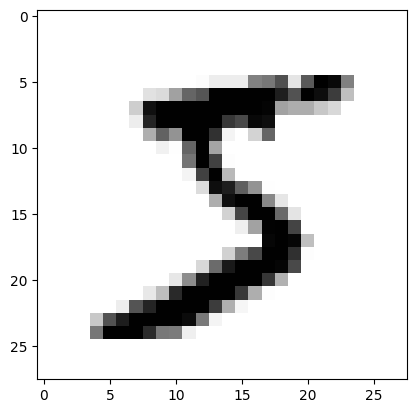

In [15]:
# 匯入 matplotlib.pyplot 模組，用於繪圖
import matplotlib.pyplot as plt

# 使用 imshow() 顯示 train_data 中的第一張圖片 (索引 0)
# - cmap='binary' 表示使用黑白色階顯示（黑白反差明顯）
#   0 → 黑色，255 → 白色
# - train_data[0] 是一個 28x28 的矩陣，每個數值代表灰階像素強度
plt.imshow(train_data[0], cmap='binary')

# 顯示圖像
plt.show()


In [16]:
# 匯入 Keras 模組
from keras.models import Sequential
from keras.layers import Dense, Flatten

# -----------------------------
# 建立序列式模型 (Sequential Model)
# -----------------------------
model = Sequential()

# -----------------------------
# 模型結構設計
# -----------------------------

# 1️⃣ Flatten 層：
# 將輸入資料攤平成一維向量
# 假設輸入是 28x28 的圖片，會攤平成 784 維
model.add(Flatten())

# 2️⃣ 第一層全連接層 (Dense layer)
# - 有 32 個神經元
# - 使用 ReLU 激活函數
# - input_dim=784 指定輸入維度（對應 Flatten 後的向量長度）
model.add(Dense(32, activation='relu', input_dim=784))

# 3️⃣ 輸出層 (Output layer)
# - 10 個神經元（對應 0~9 的分類）
# - 使用 sigmoid 激活函數（建議多分類問題使用 softmax 會更合適）
model.add(Dense(10, activation='sigmoid'))

# -----------------------------
# 編譯模型
# -----------------------------
# - optimizer='rmsprop'：使用 RMSProp 優化器
# - loss='sparse_categorical_crossentropy'：適用於整數標籤的多分類問題
# - metrics=['accuracy']：評估指標為準確率
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [17]:
# -----------------------------
# 訓練模型
# -----------------------------
# model.fit() 用來進行模型訓練
# 參數說明：
# - train_data: 訓練資料 (輸入特徵)
# - train_label: 訓練標籤 (輸入標籤)
# - epochs=20: 訓練 20 個完整週期 (遍歷整個訓練集 20 次)
# - batch_size=512: 每次梯度更新使用 512 筆資料 (mini-batch)
model.fit(train_data, train_label, epochs=20, batch_size=512)

# -----------------------------
# 評估模型在測試集上的表現
# -----------------------------
# model.evaluate() 會回傳 [loss, accuracy]（依 compile 設定的 metrics）
# - test_data: 測試資料
# - test_label: 測試標籤
score = model.evaluate(test_data, test_label)

# 印出模型在測試集上的準確率 (accuracy)
# score[0] → loss 值
# score[1] → accuracy
print(score[1])


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3575 - loss: 31.7747
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5191 - loss: 1.1332
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5381 - loss: 0.7542
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5301 - loss: 0.6239
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5113 - loss: 0.4937
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5016 - loss: 0.4140
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4995 - loss: 0.3682
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4989 - loss: 0.3411
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4944 - loss: 0.3068
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5033 - loss: 0.2756
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5042 - loss: 0.2630
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste